<a href="https://colab.research.google.com/github/RichBen03/Machine-Learning/blob/main/crime_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

In [2]:
# Download latest version
path = kagglehub.dataset_download("kaggle/san-francisco-crime-classification")
print("Path to dataset files:", path)


100%|██████████| 41.3M/41.3M [00:00<00:00, 193MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kaggle/san-francisco-crime-classification/versions/2


In [3]:
import pandas as pd
import os

In [4]:
data_path = os.path.join(path, "train.csv")
df = pd.read_csv(data_path)

In [5]:
# Information abiut the data set
print(df.describe())
print(df.info())

                   X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB
None


In [6]:
# Check for missing values in the dataset
print(df.isnull().sum())

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64


Data Preprocessing Stage

In [7]:
# Step 3: Data Preprocessing using sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [8]:
le_category = LabelEncoder()
le_day = LabelEncoder()
le_district = LabelEncoder()

In [9]:
df['Category'] = le_category.fit_transform(df['Category'])
df['DayOfWeek'] = le_day.fit_transform(df['DayOfWeek'])
df['PdDistrict'] = le_district.fit_transform(df['PdDistrict'])

Feature Scaling

In [10]:
# Feature matrix
features = df[['Category', 'DayOfWeek', 'PdDistrict', 'X', 'Y']]

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Necessary **libraries**

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

KMeans Clustering

In [15]:
inertia = []
k_range = range(1, 11)

In [16]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

## Elbow Curve

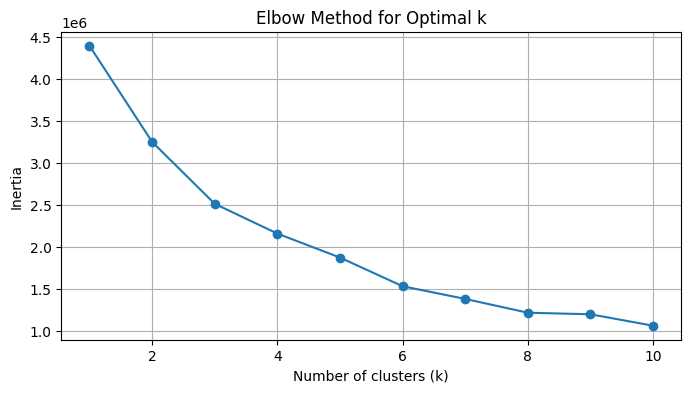

In [17]:
# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


# Applying K-Means Algorithm

In [18]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)
cluster_labels = kmeans.labels_


In [19]:
df['Cluster'] = cluster_labels
print(df[['Category', 'DayOfWeek', 'PdDistrict', 'Cluster']].head())

   Category  DayOfWeek  PdDistrict  Cluster
0        37          6           4        2
1        21          6           4        2
2        21          6           4        2
3        16          6           4        2
4        16          6           5        2



## Plotting cluster distribution using seaborn

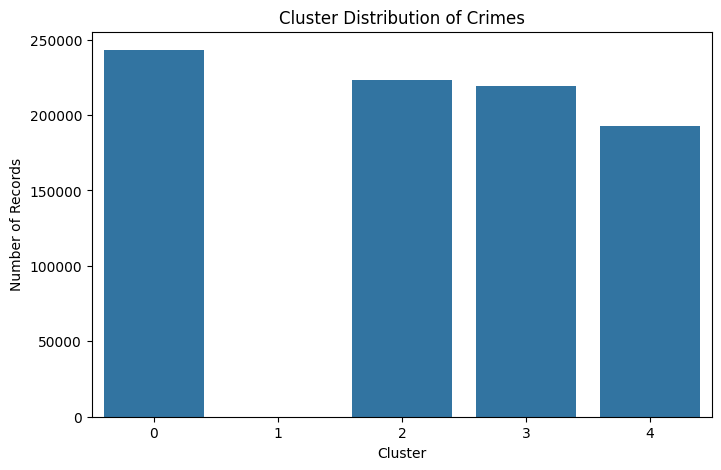

In [20]:
import seaborn as sns

# Plot cluster distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Distribution of Crimes')
plt.xlabel('Cluster')
plt.ylabel('Number of Records')
plt.show()


### Step 7: Model Evaluation

In [23]:
import numpy as np

# Step 7: Model Evaluation (with sampling)
n_samples = 5000  # adjust as needed: 5000–10000 is usually plenty

if len(scaled_features) > n_samples:
    idx = np.random.choice(len(scaled_features), n_samples, replace=False)
    sampled_features = scaled_features[idx]
    sampled_labels = cluster_labels[idx]
else:
    sampled_features = scaled_features
    sampled_labels = cluster_labels

from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_score = silhouette_score(sampled_features, sampled_labels)
db_score = davies_bouldin_score(sampled_features, sampled_labels)

print(f"Silhouette Score (sampled): {sil_score:.3f}")
print(f"Davies-Bouldin Index (sampled): {db_score:.3f}")


Silhouette Score (sampled): 0.195
Davies-Bouldin Index (sampled): 1.105
